<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/03_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 매트릭스 dot product

In [ ]:
import numpy as np
  
w = np.array([ [ 2, 1 ],
               [ 0, 1 ] ])
x = np.array([ 3, 4 ])
y = np.dot(w,x)
print(y)

[[2 1]
 [0 1]]
[3 4]
[10  4]


# 이미지를 읽어들이기

**pillow**

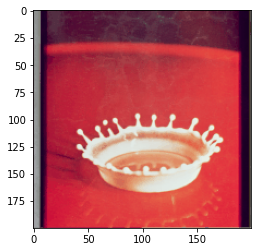

In [32]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# pillow
from PIL import Image

img_url = 'http://sipi.usc.edu/database/preview/misc/4.2.01.png'
filename = 'milk.png'
#img_url = 'http://data.si.re.kr/photo_ndownload/21555'
#filename = 'seoul.jpg'

img_path = keras.utils.get_file(filename, img_url)

img = Image.open(img_path) # use Image.open(image_location)
image = np.array(img.convert('RGB')) # to convert img object to array value use np.array

plt.imshow(image)

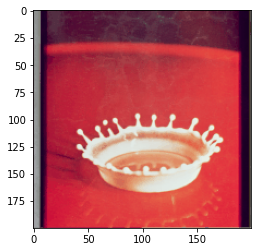

In [33]:
import cv2

image = cv2.imread(img_path)
# convert opencv RGB for opencv
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

MNIST 데이터

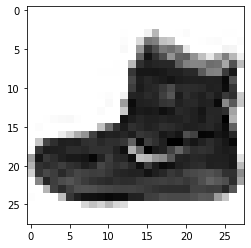

In [27]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)


# 이미지 저장

In [38]:
# PIL
from PIL import Image
import numpy as np

PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
PIL_image.save('test.jpg')

In [47]:
# opencv
import cv2

# convert opencv RGB for opencv
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('test.jpg', image)

True

In [42]:
# matplotlib
from matplotlib import pyplot as plt
plt.imsave('test.jpg', image)


In [43]:
!ls -l test.jpg


-rw-r--r-- 1 root root 6932 Aug 27 02:31 test.jpg


## Affine 변환

8192/2823 [=======================================================================================] - 0s 0us/step


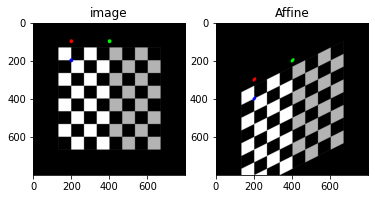

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Checkerboard_identity.svg/800px-Checkerboard_identity.svg.png'
img_path = keras.utils.get_file("checkerboard.jpg", img_url)
img = cv2.imread(img_path)

rows, cols, ch = img.shape

# 점3개를 변환 전과 변환 후로 나누어 지정
pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

# Affine 변환 텐서 얻기
M = cv2.getAffineTransform(pts1, pts2)

# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

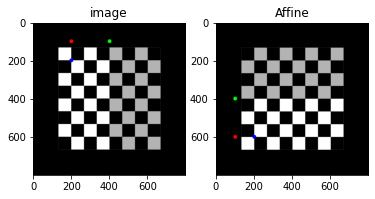

In [ ]:
center = (cols/2, rows/2)
angle = 90
scale = 1
# 회전 변환
M = cv2.getRotationMatrix2D(center, angle, scale)
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

In [ ]:
from matplotlib import image as mp_image
img = mp_image.imread('filename.png')

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
from PIL import Image

img = Image.open('myImage.png') # use Image.open(image_location) 
image_data = np.array(img) # to convert img object to array value use np.array